## Home Task 1. Hypothesis Testing for Proportions

A company believes that percentage of resident in Ternopil own vehicle is `60%` or less. <br>
Sales manager disagree. He conducted a test surveying `250` residents and `170` responded yes to owning a vehicle. <br>

State the null hypothesis and alternative hypothesis. <br>
At 10% significance level, is there enough evidence to reject the null hypothesis?


**Note**: 
- Significance level is opposite to confidence level e.g. 10% significance level means 90% of confidence level.
- This is one taled task since is percentage `60%` **OR LESS**

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [6]:
class ProportionHypothesisTest:
    def __init__(self, sample_success, sample_size, null_hypothesis_proportion, significance_level):
        self.sample_success = sample_success
        self.sample_size = sample_size
        self.null_hypothesis_proportion = null_hypothesis_proportion
        self.significance_level = significance_level

    def perform_test(self):
        # Calculate the sample proportion
        sample_proportion = self.sample_success / self.sample_size

        # Calculate the standard error
        standard_error = np.sqrt((self.null_hypothesis_proportion * (1 - self.null_hypothesis_proportion)) / self.sample_size)

        # Calculate the z-value
        z_value = (sample_proportion - self.null_hypothesis_proportion) / standard_error

        # Calculate the critical z-value
        critical_z_value = norm.ppf(1 - self.significance_level / 2)

        # Print the results
        print(f'Calculated: {z_value:.4f}')
        print(f'Critical: {critical_z_value:.4f}')

        return z_value, critical_z_value

sample_success = 170
sample_size = 250

null_hypothesis_proportion = 0.60
significance_level = 0.10

test = ProportionHypothesisTest(sample_success, sample_size, null_hypothesis_proportion, significance_level)
z_value, critical_z_value = test.perform_test()

Calculated: 2.5820
Critical: 1.6449


In [13]:
def plot_results(z_value, critical_z_value):
    x = np.linspace(-3, 3, 100)
    plt.plot(x, norm.pdf(x), alpha=0.4, label='Gauss')
    x_fill = x[x < critical_z_value]
    plt.fill_between(x_fill, 0, norm.pdf(x_fill), facecolors='green', alpha=0.4)
    plt.plot(z_value, norm.pdf(z_value), 'go')
    plt.text(critical_z_value, norm.pdf(critical_z_value), '{:.3}'.format(critical_z_value), color='blue')
    plt.text(z_value, norm.pdf(z_value), '{:.3}'.format(z_value), color='g')
    plt.show()

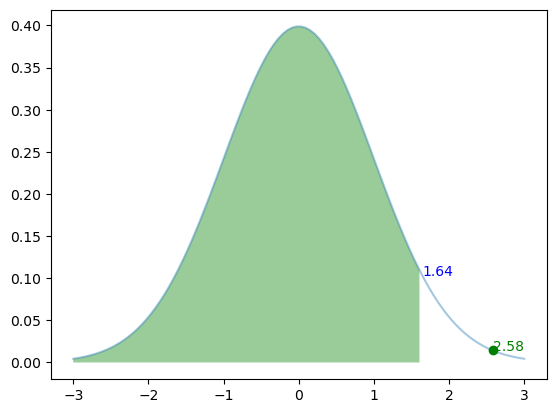

In [14]:
plot_results(z_value, critical_z_value)